In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from pandas import plotting
from sklearn import preprocessing, decomposition
from sklearn.svm import LinearSVC, SVC
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import scipy.stats
import mglearn
import matplotlib.pyplot as plt
from sklearn import svm, metrics, preprocessing#機械学習用のライブラリを利用
from mlxtend.plotting import plot_decision_regions #学習結果をプロットする外部ライブラリを利用

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


[0.95987742 0.03671834]


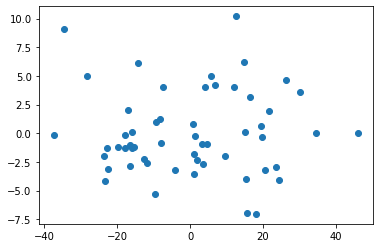

正答率 =  0.8235294117647058


In [2]:
# データの読み込み
df_sunlight = pd.read_csv('sunlight_hours.csv', index_col=0)
df_temp = pd.read_csv('NiigataKishou_temp.csv', index_col = 0)
df_humidity = pd.read_csv('arrange_humidity.csv', index_col = 0)
df_yield = pd.read_csv('niigata_rice_10a.csv', index_col = 0)

# dataframeから配列に変換
sunlight = df_sunlight['2'].values
temp = df_temp['2'].values
humidity = df_humidity['2'].values
rice_yield = np.array(df_yield['Yield/10a(t)'].values)

# 3つのデータの配列を55x3のnumpy2次元配列に変換
data = np.empty([0, 3])
for i in range(len(sunlight)):
    temp_array = np.array([sunlight[i], temp[i], humidity[i]])
    data = np.append(data, np.array([temp_array]), axis = 0)


# クラスラベルを生成. 1を豊作に.
y_judge = np.empty([0,1])
for j in rice_yield:
    if j >= 480:
        y_judge = np.append(y_judge, 1)
    else:
        y_judge = np.append(y_judge, 0)

y_judge = np.array(y_judge, dtype=int)


# PCA 55x3の気候データを55x2の気候データに圧縮
pca = PCA(n_components=2)
pca.fit(data)
# 各主成分によってどの程度カバー出来ているかの割合(第一主成分，第二主成分)
print(pca.explained_variance_ratio_)

# 次元削減をdataに適用し, pca_pointに渡す.
pca_point = pca.transform(data) # pca_pointは55x1


# 気候データの２次元のプロット
plt.scatter(pca_point[:, 0], pca_point[:, 1] )
plt.show()


# SVM
# pca_pointを標準化
sc=preprocessing.StandardScaler()
sc.fit(pca_point)
# 標準化をpca_pointに適用する．
pca_point=sc.transform(pca_point)



# ここで, pca_pointとrice_yieldで55行2列のデータを作らないといけない
X_data = np.empty([0, 2])
for i in range(len(pca_point)):
    temp_array = np.array([pca_point[i][0], pca_point[i][1]])
    X_data = np.append(X_data, np.array([temp_array]), axis = 0)


# trainデータとtestデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_data, y_judge, test_size=0.3, random_state=None )

# SVM LinearSVC trainデータで訓練
clf_result=LinearSVC(loss='hinge', C=1.0,class_weight='balanced', random_state=0)#loss='squared_hinge' #loss="hinge", loss="log"
clf_result.fit(X_train, y_train)

#正答率を求める
pre=clf_result.predict(X_test)
ac_score=metrics.accuracy_score(y_test,pre)
print("正答率 = ",ac_score)




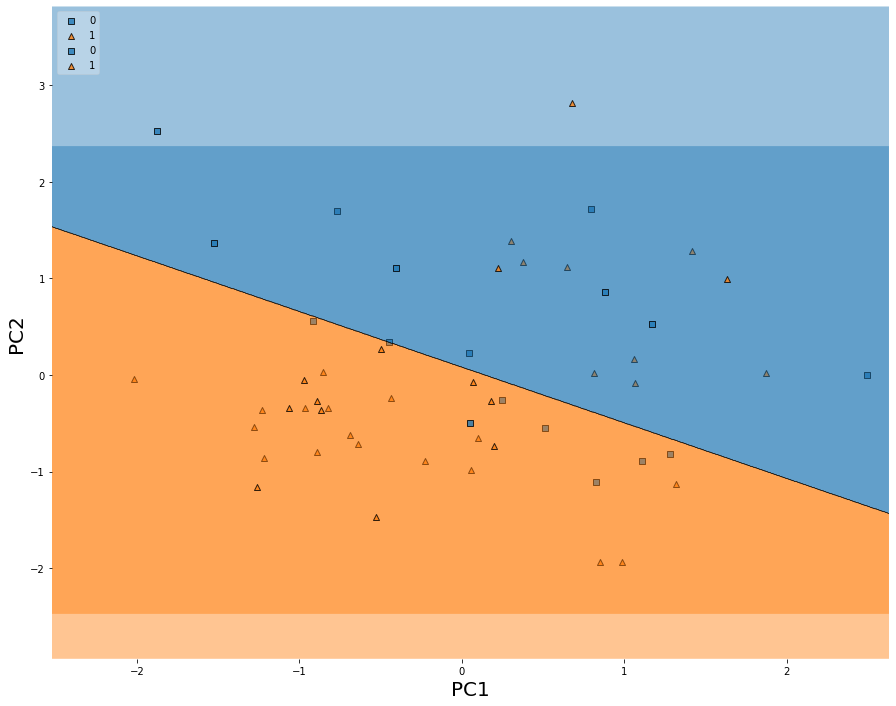

In [3]:
#plotする
X_train_plot=np.vstack(X_train)
y_train_plot=np.hstack(y_train)
X_test_plot=np.vstack(X_test)
y_test_plot=np.hstack(y_test)
fig = plt.figure(figsize=(15, 12))
plt.xlabel("PC1", fontsize = 20)
plt.ylabel("PC2",fontsize = 20)
fig1 = plot_decision_regions(X_train_plot, y_train_plot, clf=clf_result, res=(2, )) #学習データをプロット
fig2 = plot_decision_regions(X_test_plot, y_test_plot, clf=clf_result, res=(2, ), legend=2) #テストデータをプロット
plt.show()

In [43]:
plot_decision_regions?